###Desafio de Analise de dados sobre frequencia de utilização de app de usuarios premium
###Código desenvolvido por Lucas Vinicio Maldonado

É necessario substituir o caminho do arquivo json caso deseje testar os scripts.

In [70]:
#Imports utilizados

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
with open(r'/content/user_activities.json') as json_file:
    df = pd.read_json (r'/content/user_activities.json')

In [72]:
##Verificar se todos os valores sao 0 ou 1

##Verificar se os 40 usuarios tem 365 valores
for x in range(len(df)):
    a = np.array(df['activities'][x])
    if not ((a==0) | (a==1)).all():
      print("Existem valores diferentes de 0 ou 1")
    if len(df['activities'][x])!=365:
      print("Faltam valores")

In [73]:
#365 valores/dias equivale a ano não bissexto
dias_mes = [31,28,31,30,31,30,31,31,30,31,30,31]
#Lista cumulativa para dia final de cada mes. Como o indice é n-1, não é necessario modificar
#[ 31  59  90 120 151 181 212 243 273 304 334 365]
dia_inic_mes = np.cumsum(dias_mes)

In [74]:
#Cria as colunas para todos os meses
nomes_mes = ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']
for x in nomes_mes:
    df[x] = np.nan

In [75]:
#Define os valores de frequencia mensal para cada usuario
def freq_mensal(idx, mes): 
    a=0
    contagem = 0
    if idx>0:
        a = dia_inic_mes[idx-1]
    for user in range(40): 
        #Contagem e atribuição de um mes para um usuario
        for x in range(a, (a+dias_mes[idx])):
            contagem += (df['activities'][user][x])

        df.loc[user, mes] = contagem
        contagem = 0
        
for idx, mes in enumerate(nomes_mes):
    freq_mensal(idx, mes)


In [76]:
#Funçao para gerar as frequencias relativas usados no Power User Curve
def rel_freq(x):
    freqs = [(value, x.count(value) / len(x)) for value in set(x)] 
    return freqs

In [77]:
mes_selec = 'fev'


xs = [x for x, y in pwr_user_curve]
ys = [y*100 for x, y in pwr_user_curve]

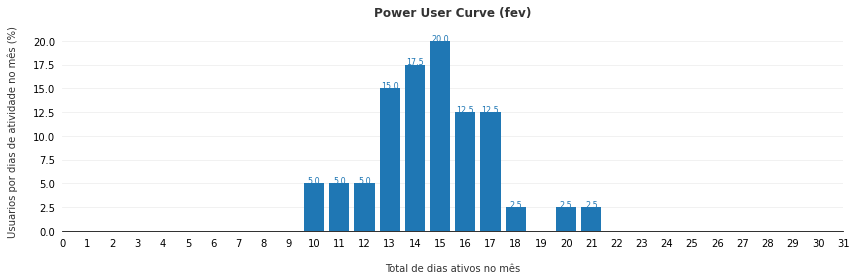

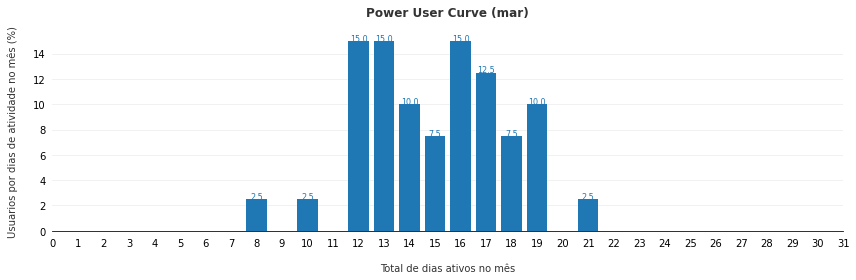

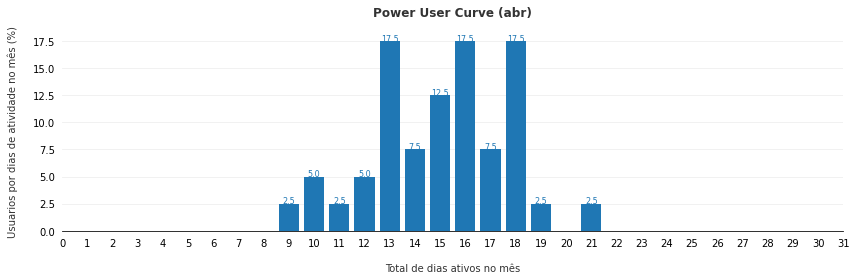

In [79]:
 #Modifica tamanho dos plots para melhor visualização neste notebook
 plt.rcParams['figure.figsize'] = [12, 4]
 #Gera os gráficos para os meses de fev, mar e abr. Para outros meses, apesas modificar pelo acronimo do mês.
 for mes in ['fev','mar','abr']:
  pwr_user_curve = rel_freq(df[mes].tolist())
  xs = [x for x, y in pwr_user_curve]
  ys = [y*100 for x, y in pwr_user_curve]
#Diversas configurações para melhorar o estilo
  fig, ax = plt.subplots()
  barplot = ax.bar(
      x=xs,
      height=ys,
  )
#O numero de dias apresentados não muda a analise. 
#Obtou-se por manter todos os meses com 31 para comparação direta entre os meses. Poderia ser configurado para corresponder ao mes.
  ax.set_xlim(0,31)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.tick_params(bottom=False, left=False)
  ax.set_axisbelow(True)
  ax.yaxis.grid(True, color='#EEEEEE')
  ax.xaxis.grid(False)
  ax.set_xticks(range(32))

  bar_color = barplot[0].get_facecolor()
  #Labels nas barras
  for bar in barplot:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.001,
        round(bar.get_height(), 1),
        horizontalalignment='center',
        color=bar_color,
        size=8
    )
  #Labels dos eixos e titulo
  ax.set_xlabel('Total de dias ativos no mês', labelpad=15, color='#333333')
  ax.set_ylabel('Usuarios por dias de atividade no mês (%)', labelpad=15, color='#333333')
  ax.set_title(f'Power User Curve ({mes})', pad=15, color='#333333',
              weight='bold')
  
  fig.tight_layout()
  plt.show()

#Interpretações e conclusões
É importante primeiramente lembrar que os usuários analisados são apenas os premium(assinantes). Além disso, apenas este indicador pode gerar interpretações equivocadas, visto que seria necessario saber quanto tempo o usuário passou dentro do aplicativo e se realizou quaisquer ações para confirmar a atividade.

A análise exclusivamente das 3 Power User Curves apresentadas não indica a existencia de usuários extramente ativos(>25 dias no mês). Existe sim, uma parcela significativa que utiliza pelo menos 15 dias ao mês, o que pode ser muito positivo tendo em perspectiva como costuma ser a interação com o app, sua finalidade e caracteristicas gerais dos usuarios.

Diferentemente de um app de redes sociais, possívelmente um usuario não retorna todos os dias a qualquer hora, mas faz uso quando possui algum tempo na sua rotina para interagir com o contéudo de forma mais analítica - seja por meio dos textos, ao usar o diário ou para refletir sobre sua autoavaliação.

É possivel que exista um subgrupo de usuários que tem seu uso mensal caindo ao longo dos meses. Uma análise em conjunto com outros indicadores (Como saber quais recursos estão sendo usados especificamente) poderia ajudar para ser mais conclusiva. Com isso, ações como notificações, sugestões e promoções específicas seriam consideras para aumentar o engajamento. Com uma série histórica maior, também seria possível realizar regressões estatísticas e ver qual costuma ser o comportamento previsto para um novo usuário.